In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
matches_df = pd.read_csv("/kaggle/input/ipl-data-set/matches.csv") 
score_df =  pd.read_csv("/kaggle/input/ipl-data-set/deliveries.csv")

In [19]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [20]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


DATA INFORMATION 

In [21]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
matches_df["umpire3"].tail()

751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [23]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [24]:
# matches we have got in the dataset
matches_df['id'].max()

11415

In [26]:
#Seasons we have got in the dataset
matches_df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [27]:
matches_df['Season'].value_counts()

Season
IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: count, dtype: int64

In [28]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [29]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [30]:
matches_df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [31]:
matches_df['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [32]:
matches_df['team2'].value_counts()

team2
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: count, dtype: int64

In [34]:
matches_df['Season'].value_counts().unique()

array([76, 74, 73, 60, 59, 58, 57])

In [35]:
matches_df['team1'].value_counts().unique()

array([101,  91,  89,  85,  83,  72,  67,  63,  43,  20,  14,   8,   7,
         6])

In [36]:
matches_df['team2'].value_counts().unique()

array([95, 89, 86, 85, 80, 75, 45, 32, 26, 16, 10,  8,  7])

In [37]:
matches_df['Season'].value_counts('team1').unique(),

(array([0.1005291 , 0.0978836 , 0.09656085, 0.07936508, 0.07804233,
        0.07671958, 0.07539683]),)

In [39]:
matches_df['Season'].value_counts('team2').unique()

array([0.1005291 , 0.0978836 , 0.09656085, 0.07936508, 0.07804233,
       0.07671958, 0.07539683])

In [40]:
matches_df['Season'].unique,['team1','value_counts']

(<bound method Series.unique of 0      IPL-2017
 1      IPL-2017
 2      IPL-2017
 3      IPL-2017
 4      IPL-2017
          ...   
 751    IPL-2019
 752    IPL-2019
 753    IPL-2019
 754    IPL-2019
 755    IPL-2019
 Name: Season, Length: 756, dtype: object>,
 ['team1', 'value_counts'])

In [41]:
matches_df['team1'].unique,['season','value_counts']

(<bound method Series.unique of 0              Sunrisers Hyderabad
 1                   Mumbai Indians
 2                    Gujarat Lions
 3           Rising Pune Supergiant
 4      Royal Challengers Bangalore
                   ...             
 751          Kolkata Knight Riders
 752            Chennai Super Kings
 753            Sunrisers Hyderabad
 754                 Delhi Capitals
 755                 Mumbai Indians
 Name: team1, Length: 756, dtype: object>,
 ['season', 'value_counts'])

In [42]:
matches_df['team2'].unique,['season','value_counts']

(<bound method Series.unique of 0      Royal Challengers Bangalore
 1           Rising Pune Supergiant
 2            Kolkata Knight Riders
 3                  Kings XI Punjab
 4                 Delhi Daredevils
                   ...             
 751                 Mumbai Indians
 752                 Mumbai Indians
 753                 Delhi Capitals
 754            Chennai Super Kings
 755            Chennai Super Kings
 Name: team2, Length: 756, dtype: object>,
 ['season', 'value_counts'])

In [44]:
  sgps = matches_df.groupby('Season')

In [45]:
sgps.team1.nunique()

Season
IPL-2008     8
IPL-2009     8
IPL-2010     8
IPL-2011    10
IPL-2012     9
IPL-2013     9
IPL-2014     8
IPL-2015     8
IPL-2016     8
IPL-2017     8
IPL-2018     8
IPL-2019     8
Name: team1, dtype: int64

In [49]:
df_2011= sgps.get_group("IPL-2011")
df_2011.team1.unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Kochi Tuskers Kerala',
       'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Pune Warriors'], dtype=object)

In [50]:
df_2017 = sgps.get_group("IPL-2017")
df_2017.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab'],
      dtype=object)

In [51]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [52]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [53]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [54]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [55]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['player_of_match']

'LMP Simmons'

In [56]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['player_of_match']

'CA Lynn'

In [57]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [60]:
matches_df.iloc[matches_df[matches_df['Season'].ge("IPL-2008")].win_by_runs.idxmin()]['player_of_match']

'SPD Smith'

In [62]:
matches_df.iloc[matches_df['Season'].idxmax()]['player_of_match']

'Harbhajan Singh'

In [63]:
sgps.player_of_match.value_counts()

Season    player_of_match
IPL-2008  SE Marsh           5
          SR Watson          4
          YK Pathan          4
          AC Gilchrist       2
          M Ntini            2
                            ..
IPL-2019  SL Malinga         1
          SPD Smith          1
          SS Iyer            1
          V Kohli            1
          VR Aaron           1
Name: count, Length: 514, dtype: int64

In [64]:
sgps.winner.value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: count, Length: 100, dtype: int64

In [65]:
sgps.win_by_runs.value_counts()

Season    win_by_runs
IPL-2008  0              34
          3               2
          6               2
          10              2
          23              2
                         ..
IPL-2019  39              1
          45              1
          46              1
          80              1
          118             1
Name: count, Length: 285, dtype: int64

In [66]:
sgps.win_by_wickets.value_counts()

Season    win_by_wickets
IPL-2008  0                 24
          9                  7
          5                  6
          7                  6
          3                  4
                            ..
IPL-2019  4                  4
          8                  3
          3                  2
          9                  2
          2                  1
Name: count, Length: 111, dtype: int64

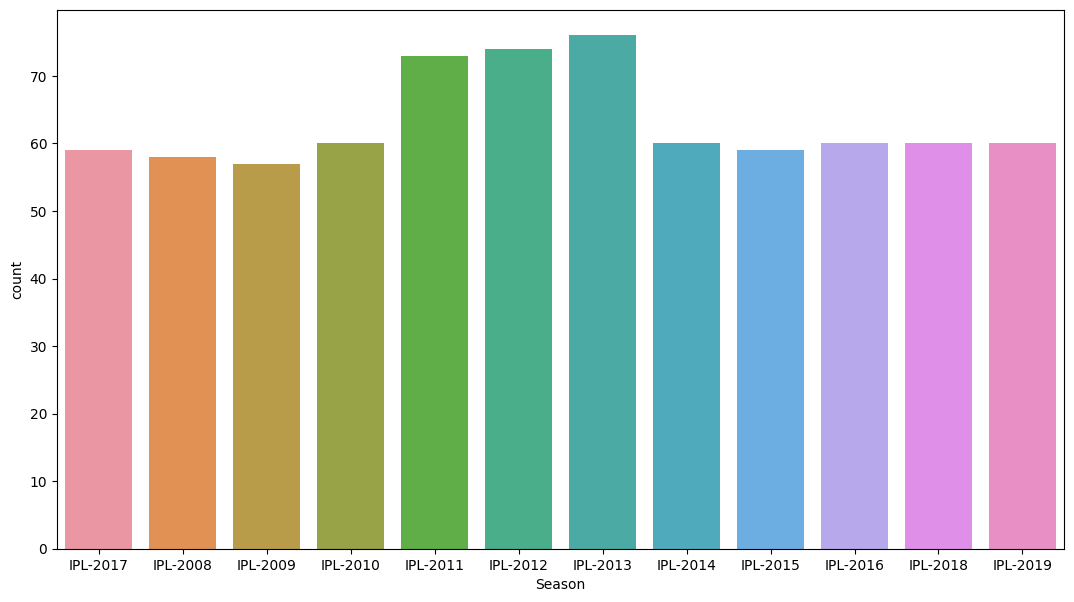

In [68]:
plt.figure(figsize=(13,7))
sns.countplot(x='Season',data=matches_df)
plt.show()

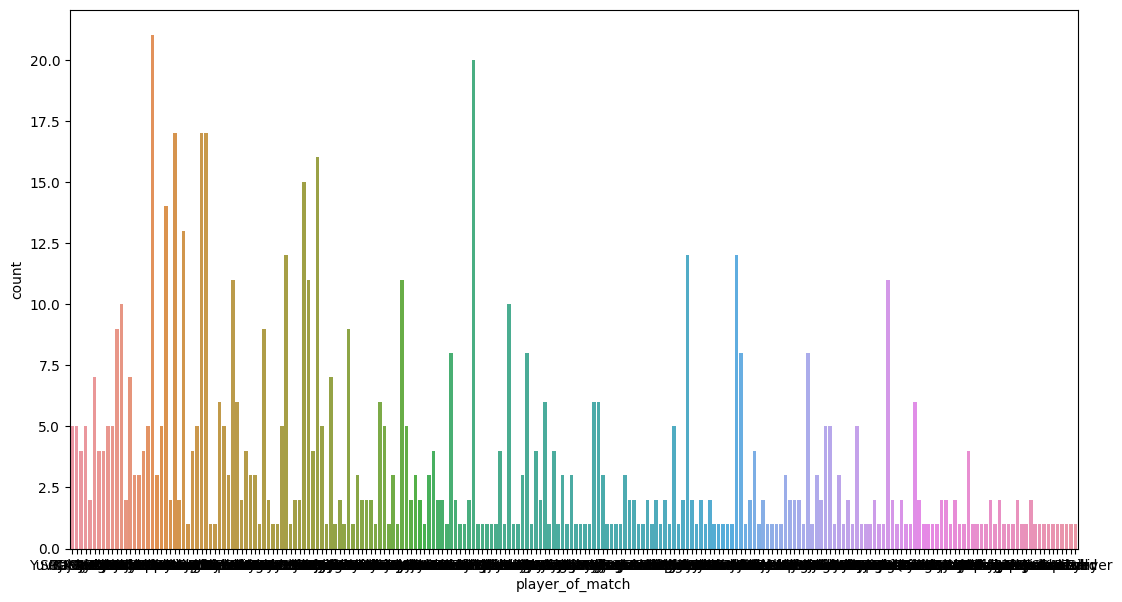

In [69]:
plt.figure(figsize=(13,7))
sns.countplot(x='player_of_match',data=matches_df)
plt.show()

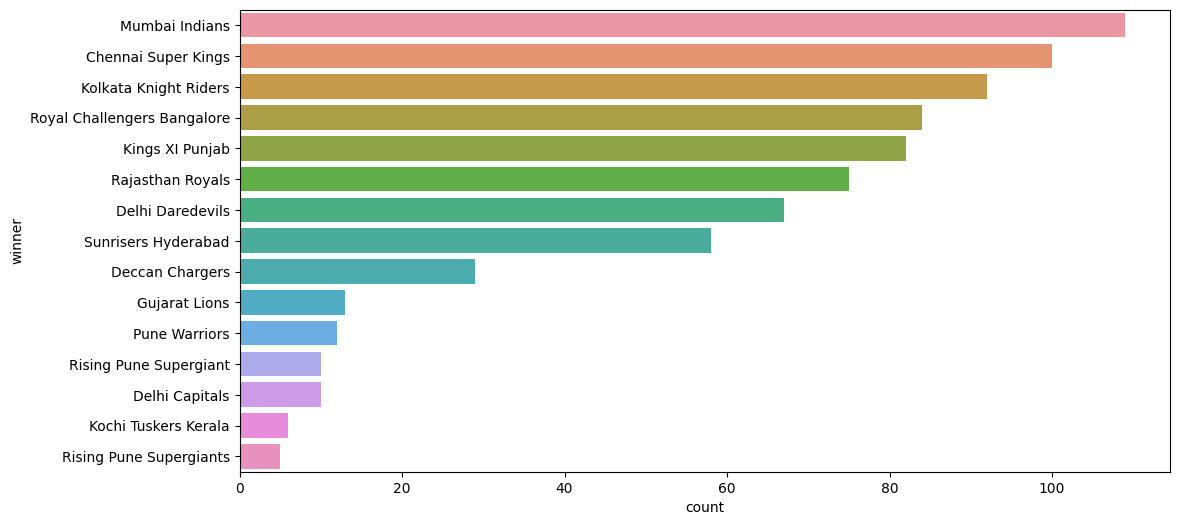

In [70]:
plt.figure(figsize=(12,6))
data=matches_df.winner.value_counts()
sns.barplot(y=data.index, x=data,orient='h')
plt.show()

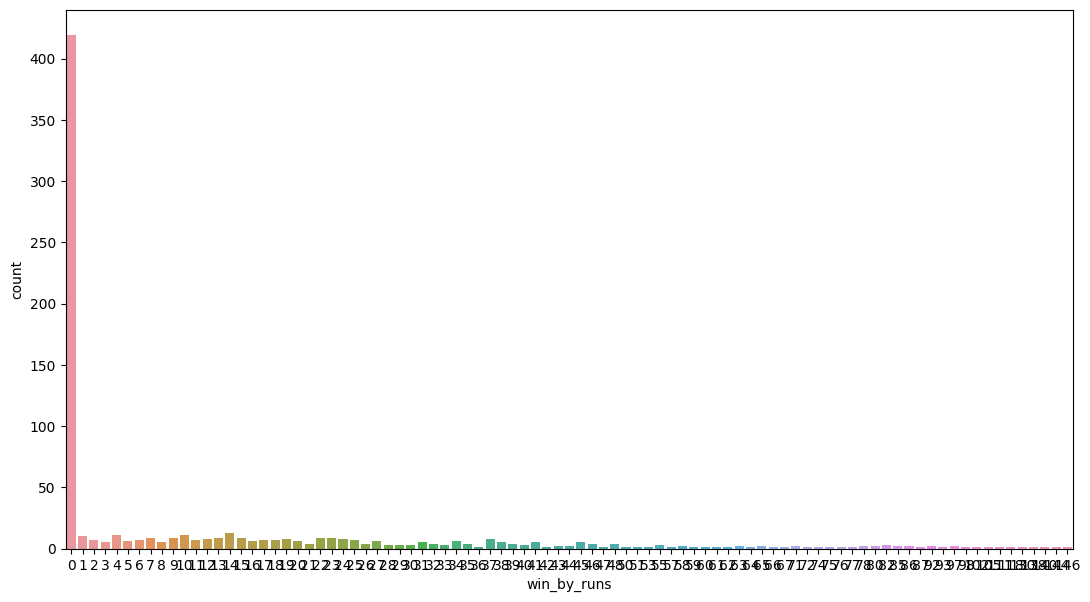

In [71]:
plt.figure(figsize=(13,7))
sns.countplot(x='win_by_runs',data=matches_df)
plt.show()

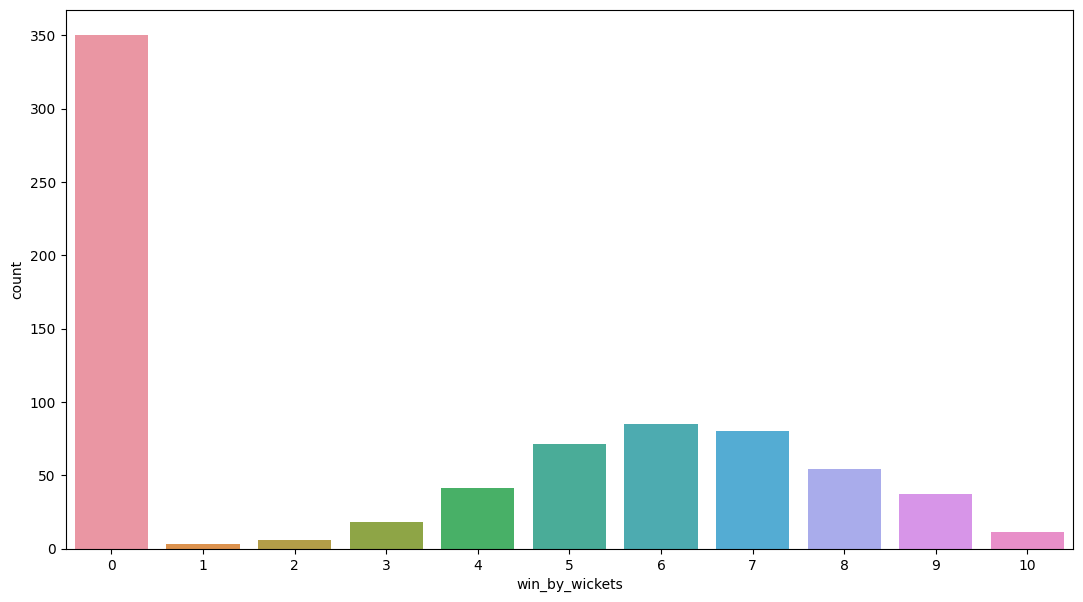

In [72]:
plt.figure(figsize=(13,7))
sns.countplot(x='win_by_wickets',data=matches_df)
plt.show()

# TOP PLAYER OF THE MATCH WINNERS

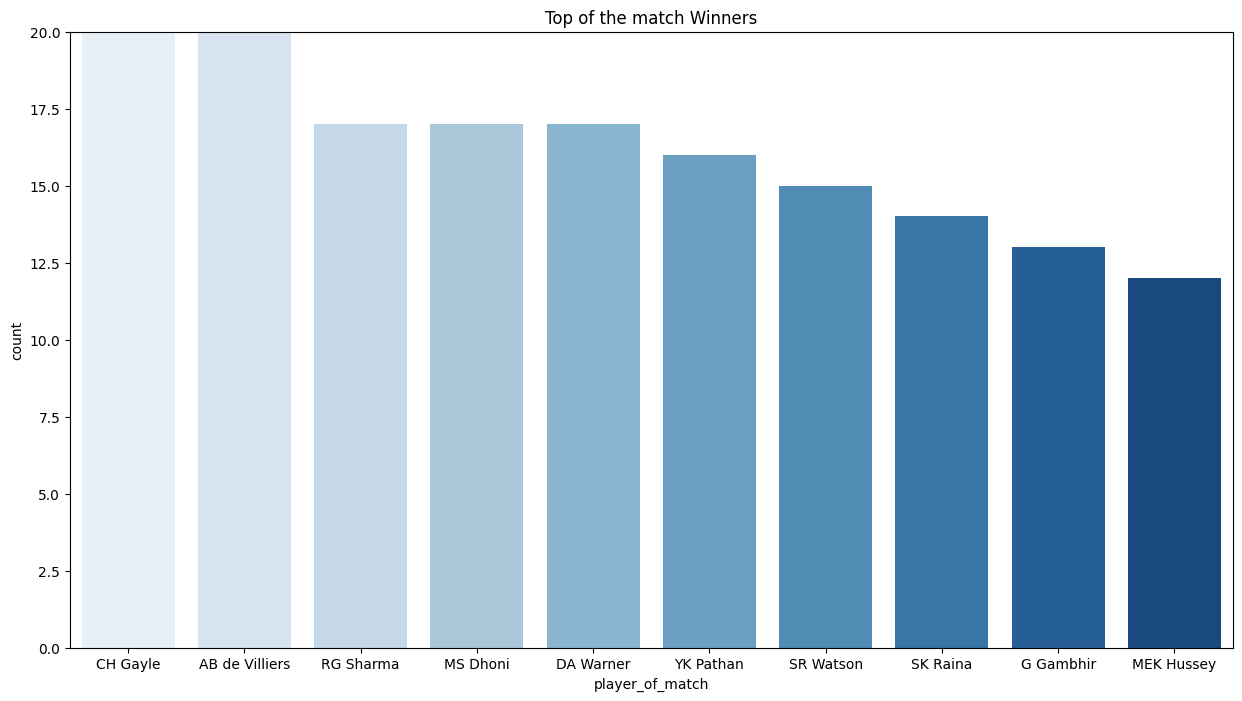

In [73]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Blues");
plt.show()

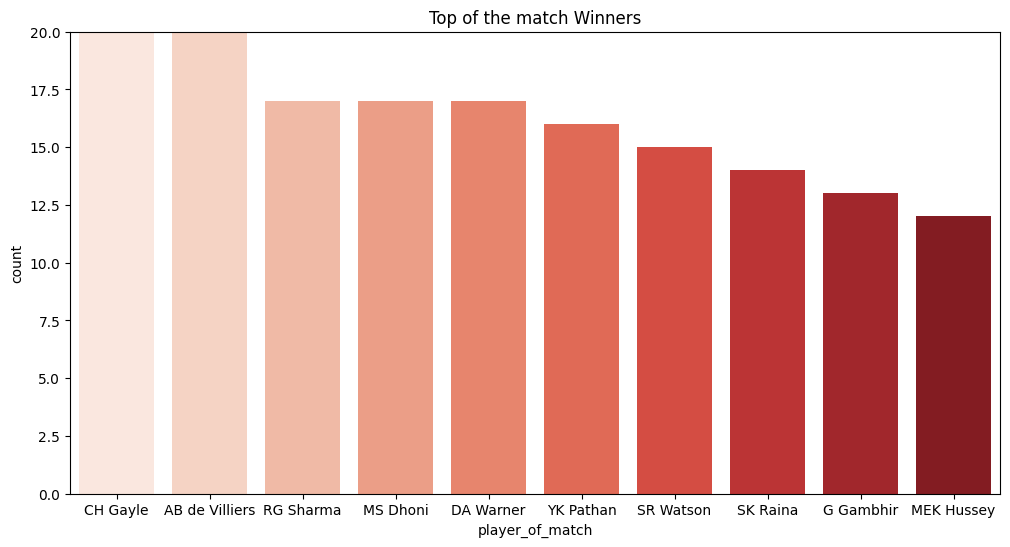

In [74]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Reds");
plt.show()

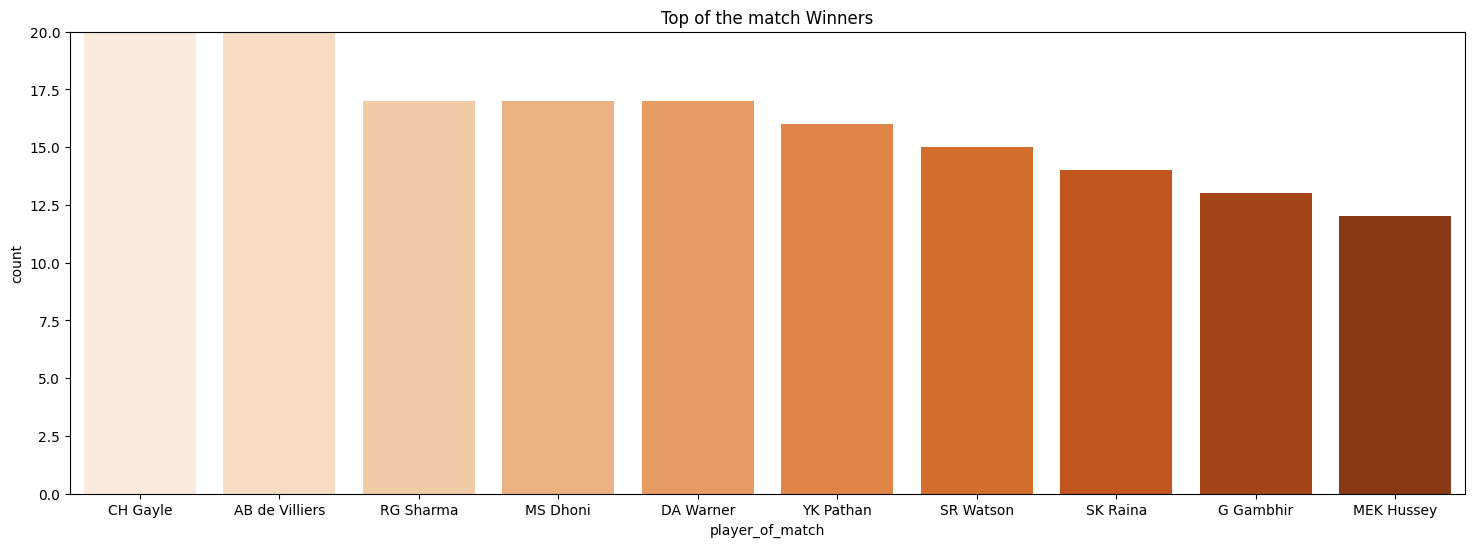

In [75]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Oranges");
plt.show()

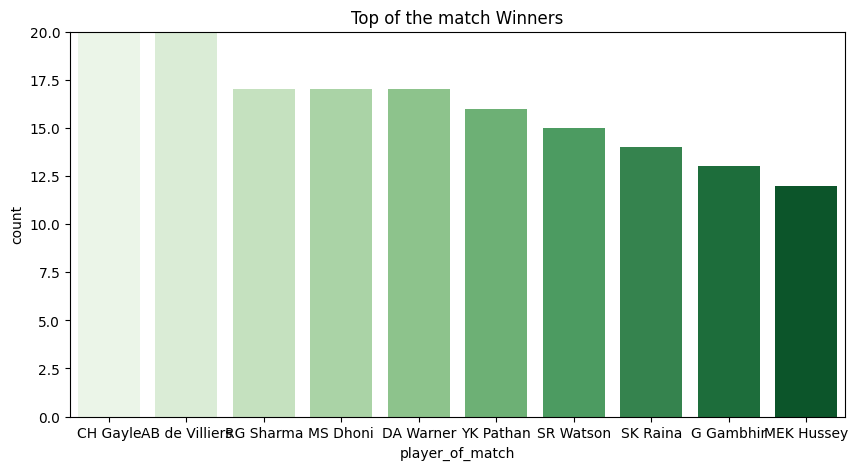

In [76]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Greens");
plt.show()

/tmp/ipykernel_34/2802560033.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_players.index, y = top_players,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


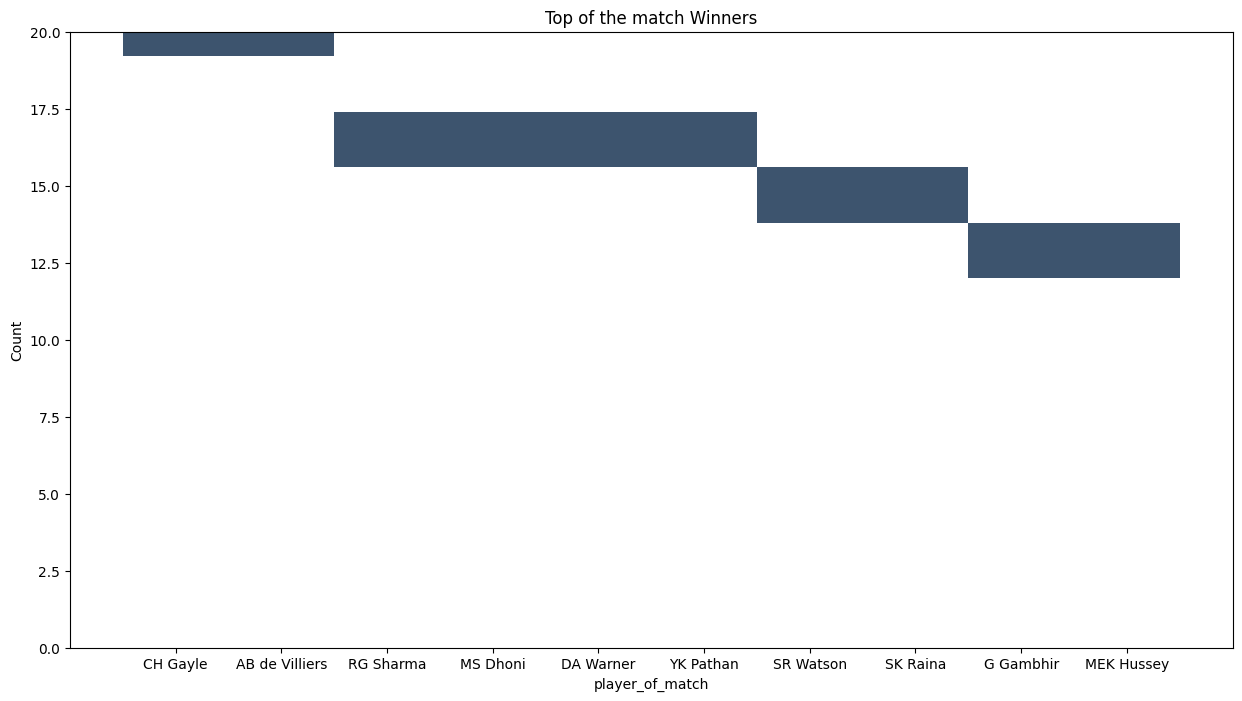

In [77]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.histplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.histplot(x=top_players.index, y = top_players,
           palette = "Blues");
plt.show()

/tmp/ipykernel_34/4183849436.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_players.index, y = top_players,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


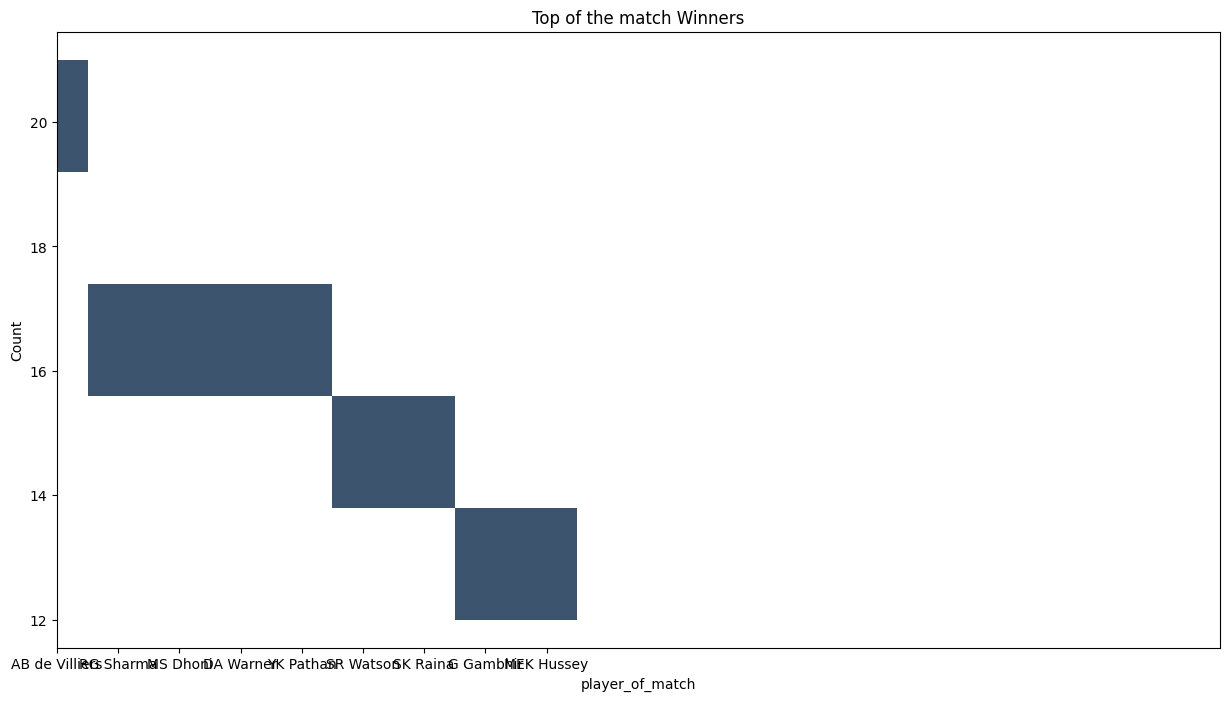

In [78]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.histplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim([1,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.histplot(x=top_players.index, y = top_players,
           palette = "Blues");
plt.show()

# NUMBER OF MATCHES IN VENUES

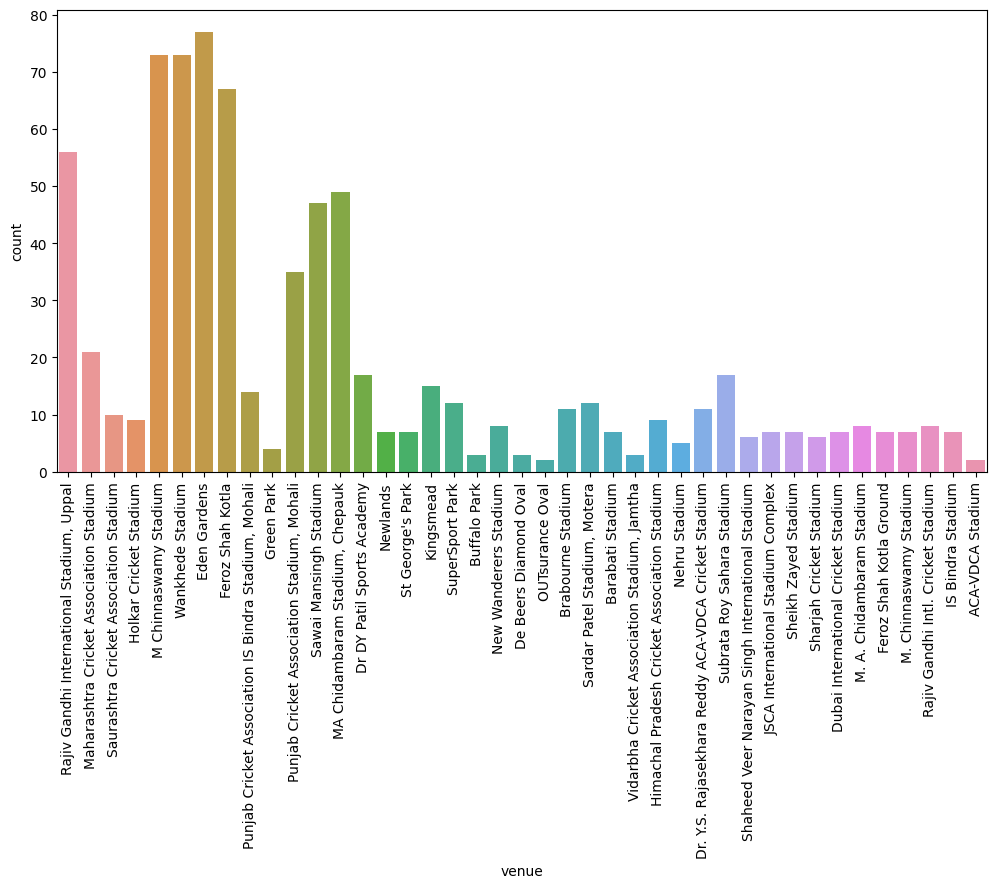

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

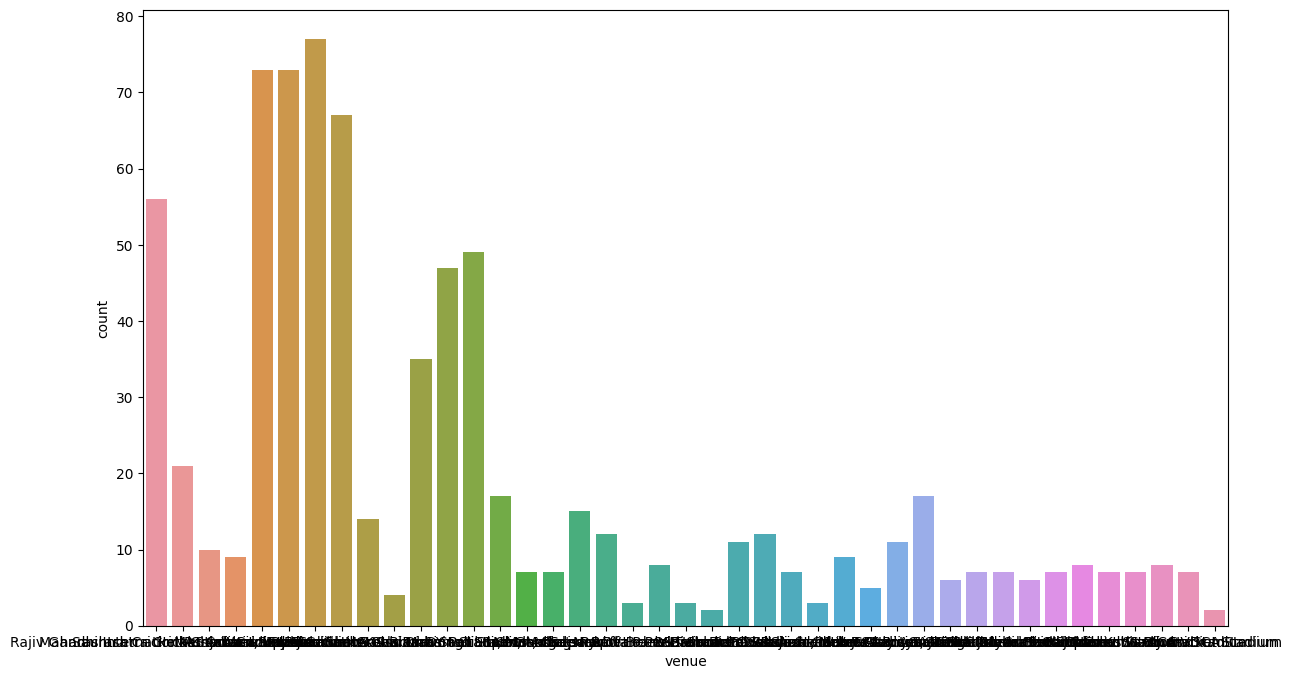

In [80]:
plt.figure(figsize=(14,8))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation='horizontal')
plt.show()

# NUMBER OF MATCHES PLAYED BY EACH TEAM:

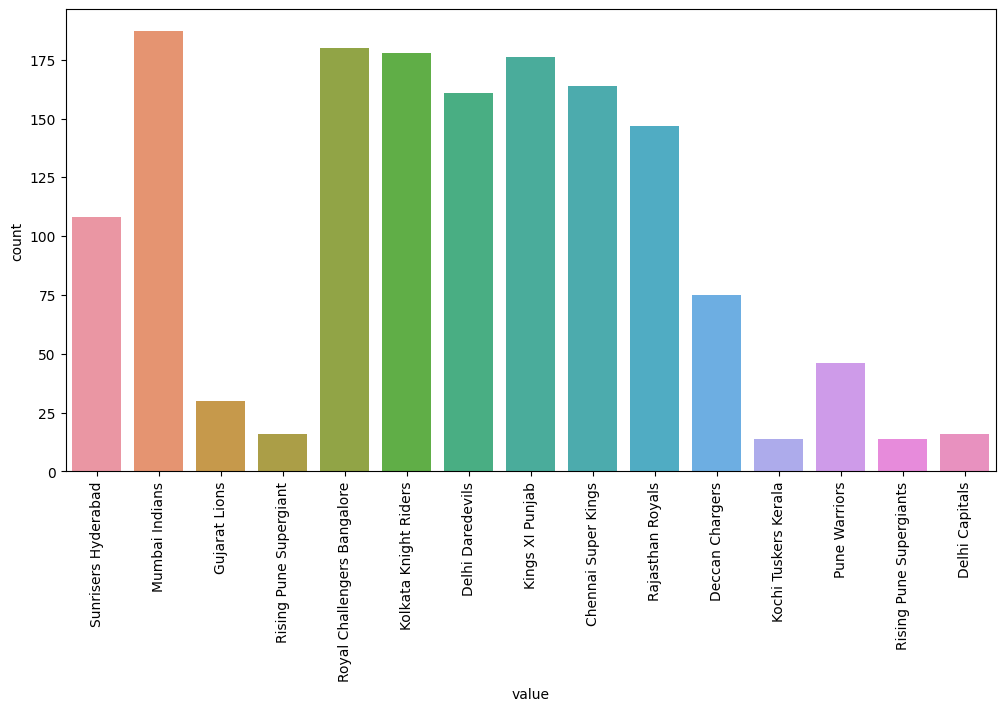

In [82]:
temp_df=pd.melt(matches_df,id_vars=['id','Season'],
               value_vars=['team1','team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

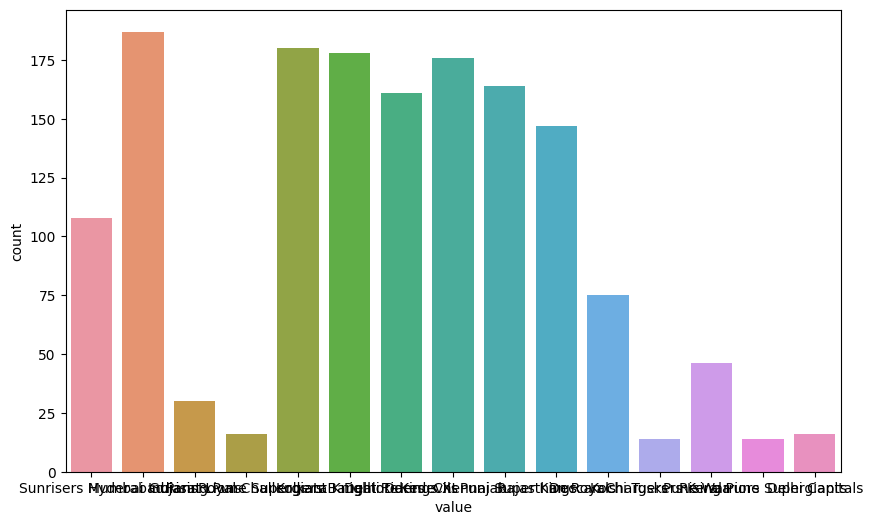

In [84]:
temp_df=pd.melt(matches_df,id_vars=['id','Season'],
               value_vars=['team1','team2'])
plt.figure(figsize=(10,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='horizontal')
plt.show()

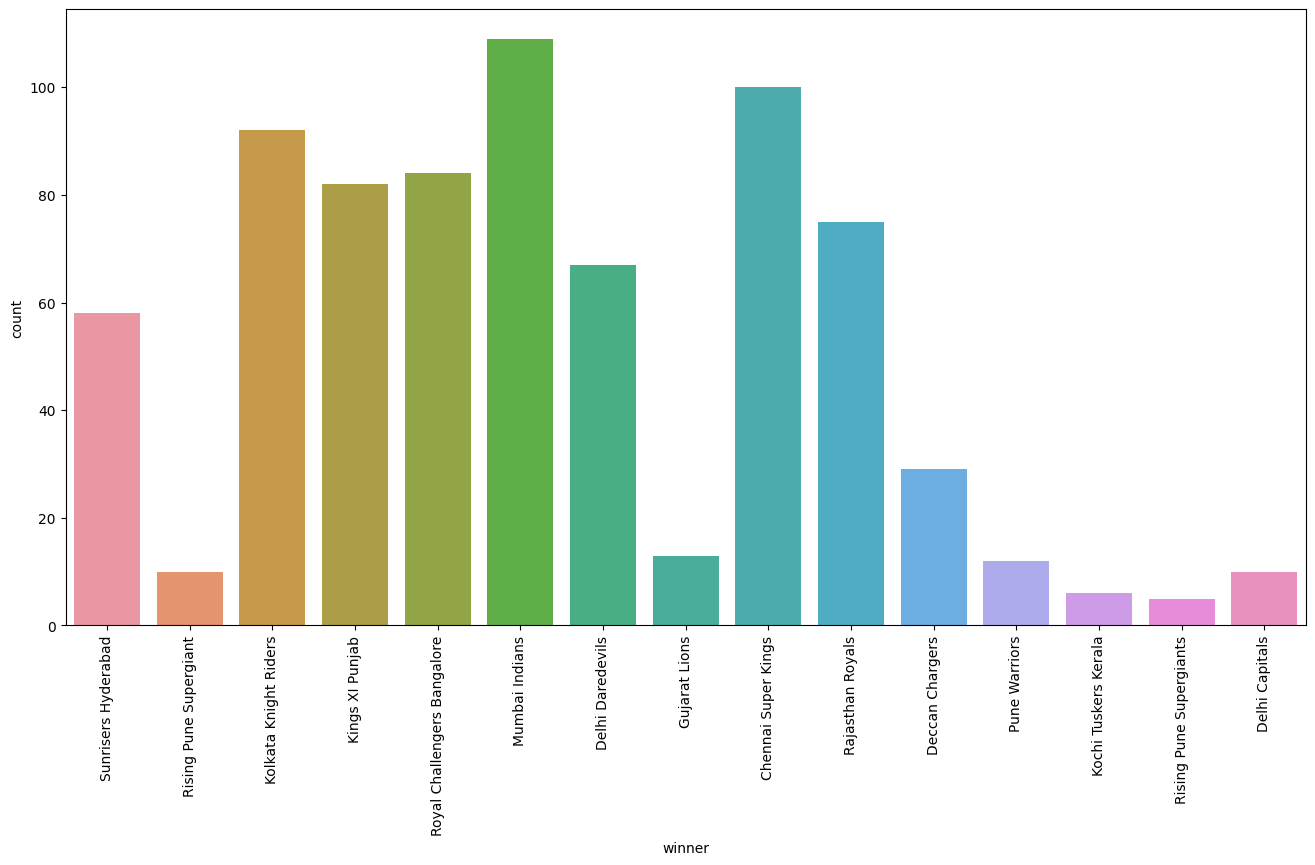

In [85]:
plt.figure(figsize=(16,8))
sns.countplot(x='winner',data=matches_df)
plt.xticks(rotation=90)
plt.show()

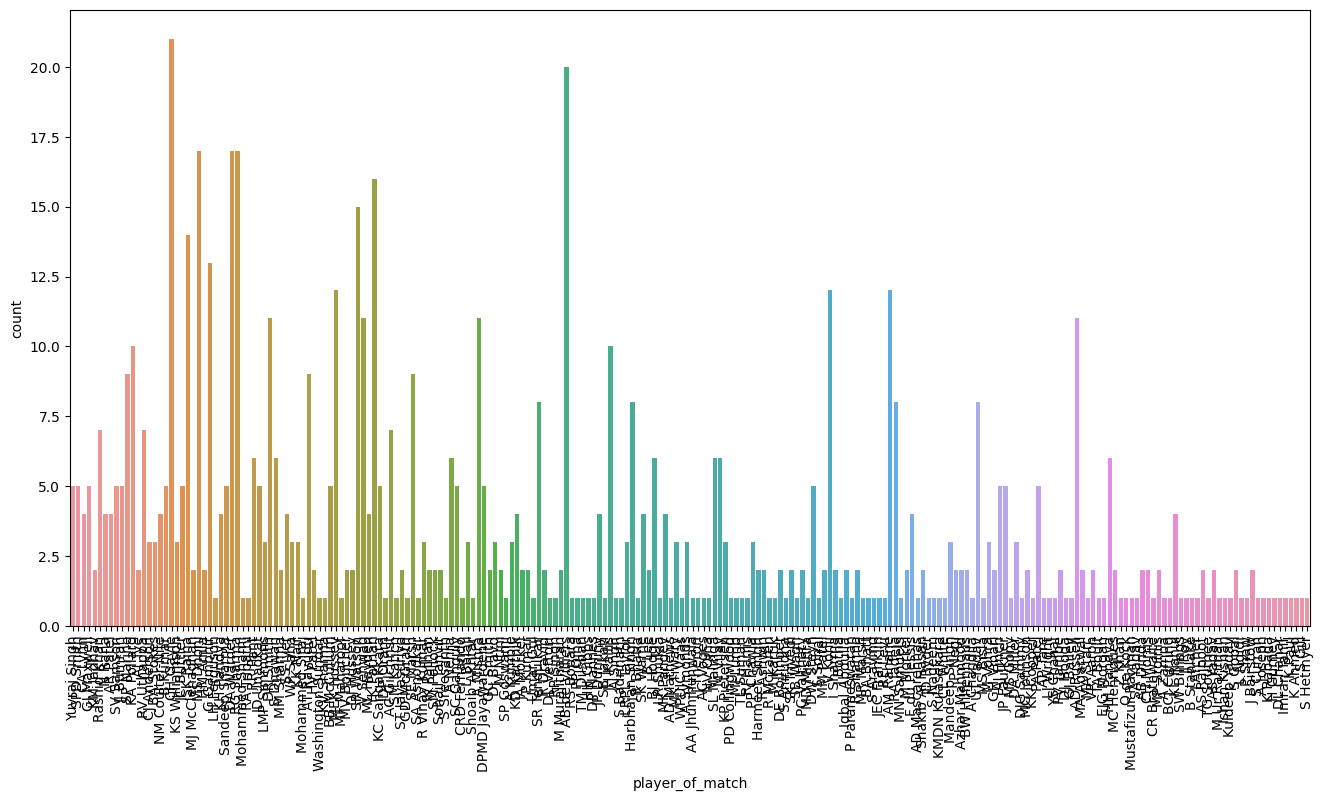

In [86]:
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data=matches_df)
plt.xticks(rotation=90)
plt.show()

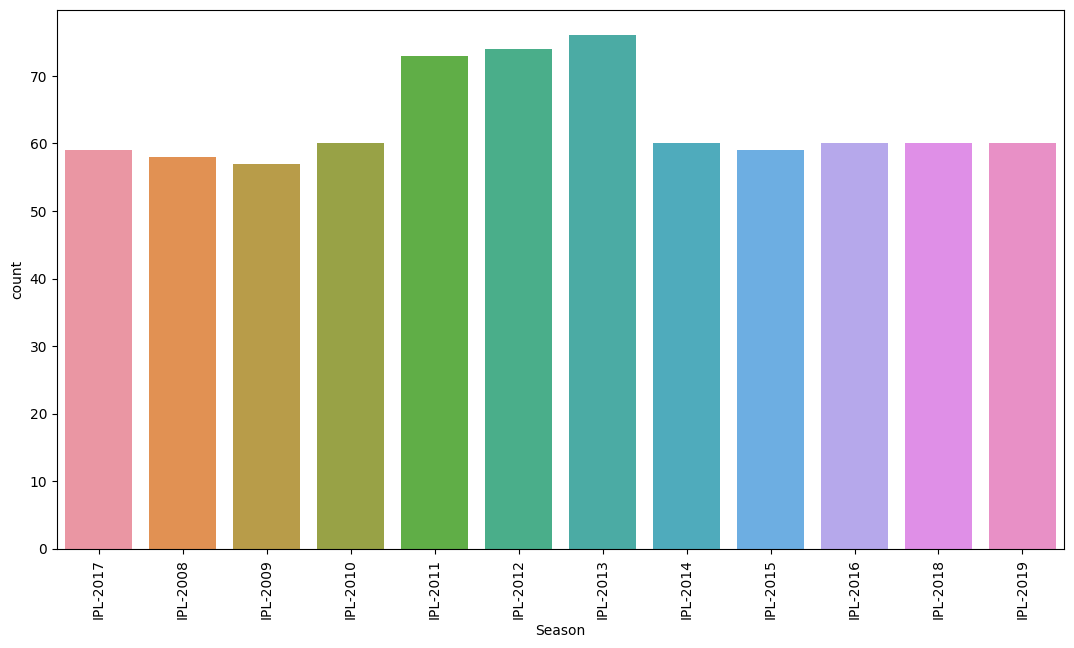

In [88]:
plt.figure(figsize=(13,7))
sns.countplot(x='Season',data=matches_df)
plt.xticks(rotation=90)
plt.show()

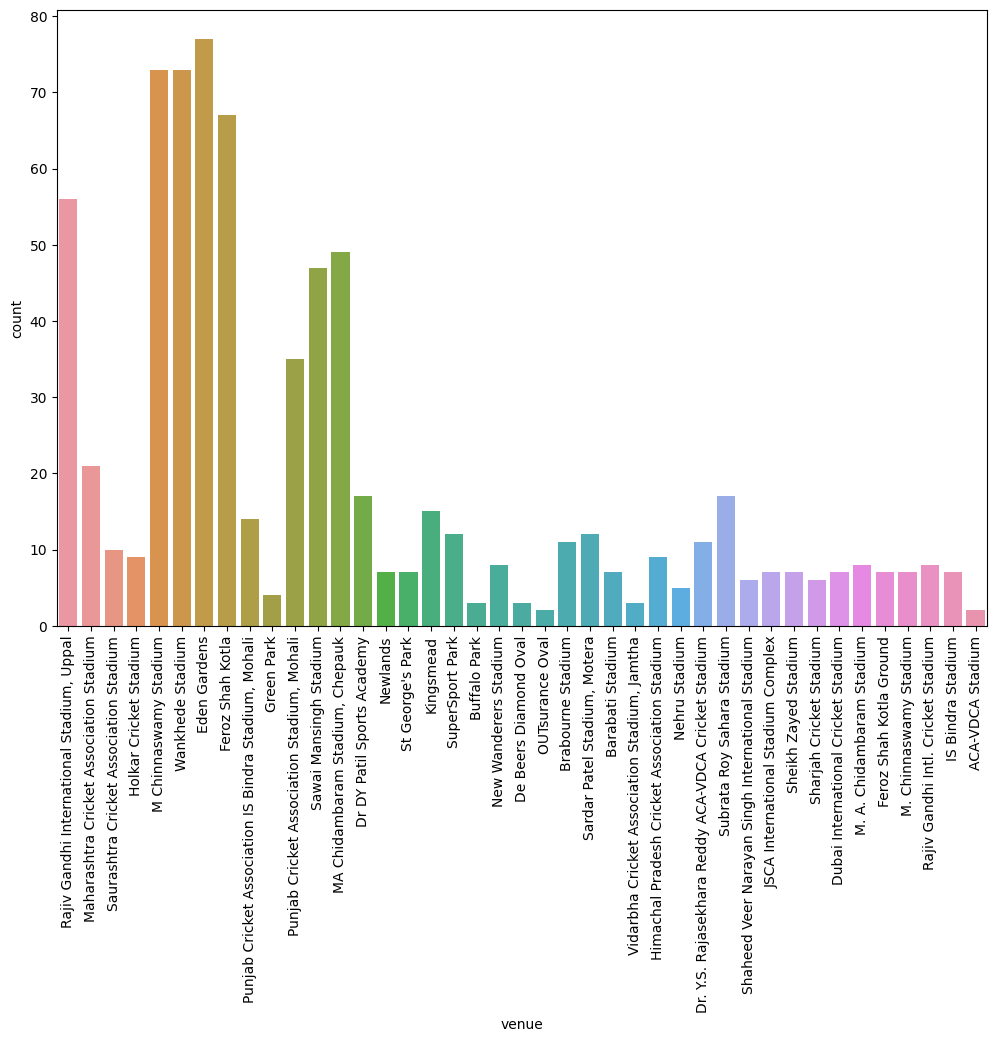

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation=90)
plt.show()

In [90]:
df_2012 = sgps.get_group("IPL-2012")
df_2012

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
307,308,IPL-2012,Chennai,04-04-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,IPL-2012,Kolkata,05-04-2012,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
309,310,IPL-2012,Mumbai,06-04-2012,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
310,311,IPL-2012,Jaipur,06-04-2012,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
311,312,IPL-2012,Bangalore,07-04-2012,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,IPL-2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
377,378,IPL-2012,Pune,22-05-2012,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium,BR Doctrove,SJA Taufel,NaN
378,379,IPL-2012,Bangalore,23-05-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
379,380,IPL-2012,Chennai,25-05-2012,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN


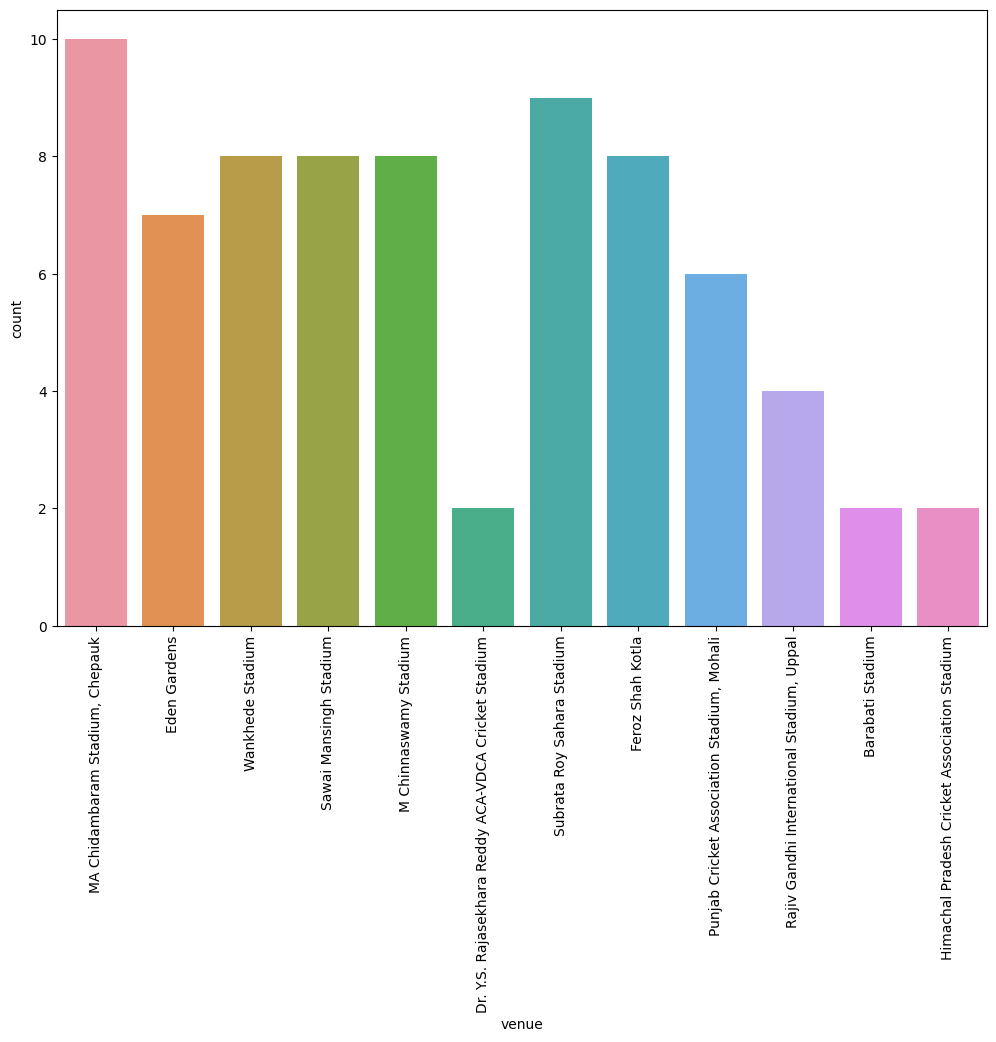

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=df_2012)
plt.xticks(rotation=90)
plt.show()

In [93]:
df_2013 = sgps.get_group("IPL-2013")
df_2013

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
381,382,IPL-2013,Kolkata,03-04-2013,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel,NaN
382,383,IPL-2013,Bangalore,04-04-2013,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin,NaN
383,384,IPL-2013,Hyderabad,05-04-2013,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
384,385,IPL-2013,Delhi,06-04-2013,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
385,386,IPL-2013,Chennai,06-04-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,IPL-2013,Hyderabad,19-05-2013,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
453,454,IPL-2013,Delhi,21-05-2013,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker,NaN
454,455,IPL-2013,Delhi,22-05-2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
455,456,IPL-2013,Kolkata,24-05-2013,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN


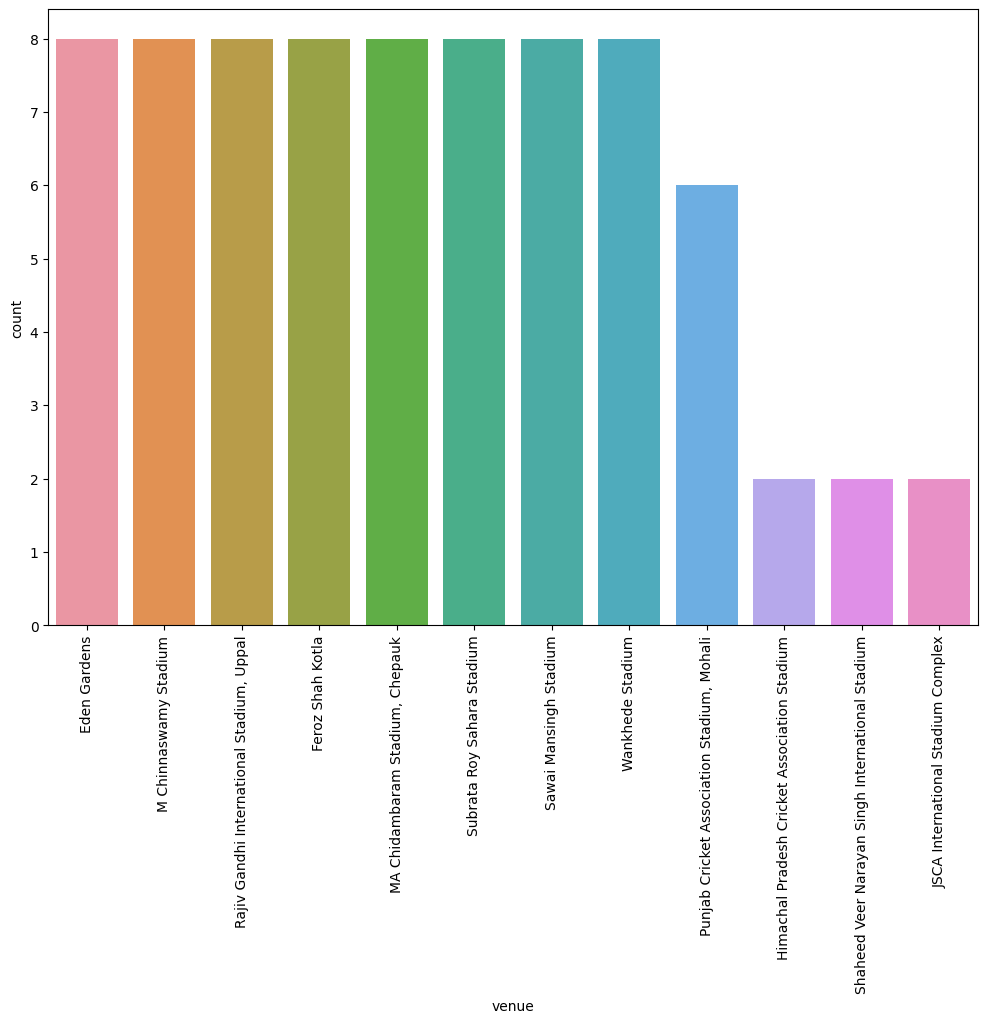

In [94]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=df_2013)
plt.xticks(rotation=90)
plt.show()

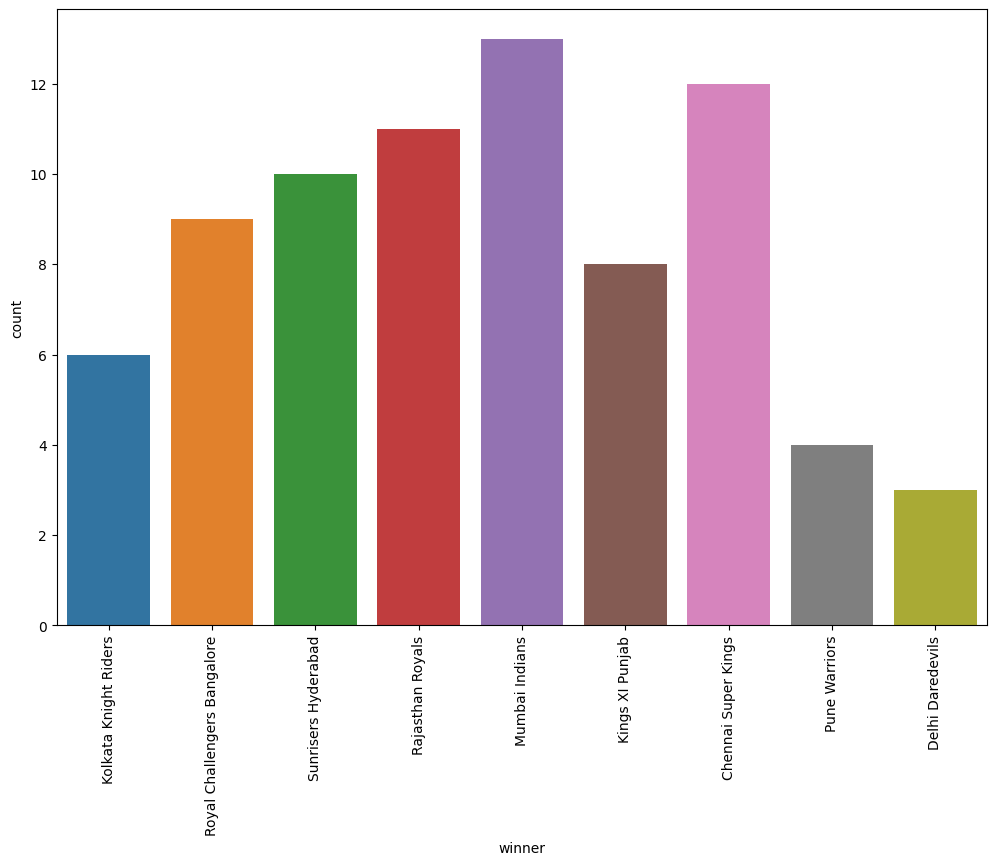

In [95]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_2013)
plt.xticks(rotation=90)
plt.show()

In [96]:
df_2012 = sgps.get_group("IPL-2012")
df_2012

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
307,308,IPL-2012,Chennai,04-04-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,IPL-2012,Kolkata,05-04-2012,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
309,310,IPL-2012,Mumbai,06-04-2012,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
310,311,IPL-2012,Jaipur,06-04-2012,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
311,312,IPL-2012,Bangalore,07-04-2012,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,IPL-2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
377,378,IPL-2012,Pune,22-05-2012,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium,BR Doctrove,SJA Taufel,NaN
378,379,IPL-2012,Bangalore,23-05-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
379,380,IPL-2012,Chennai,25-05-2012,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN


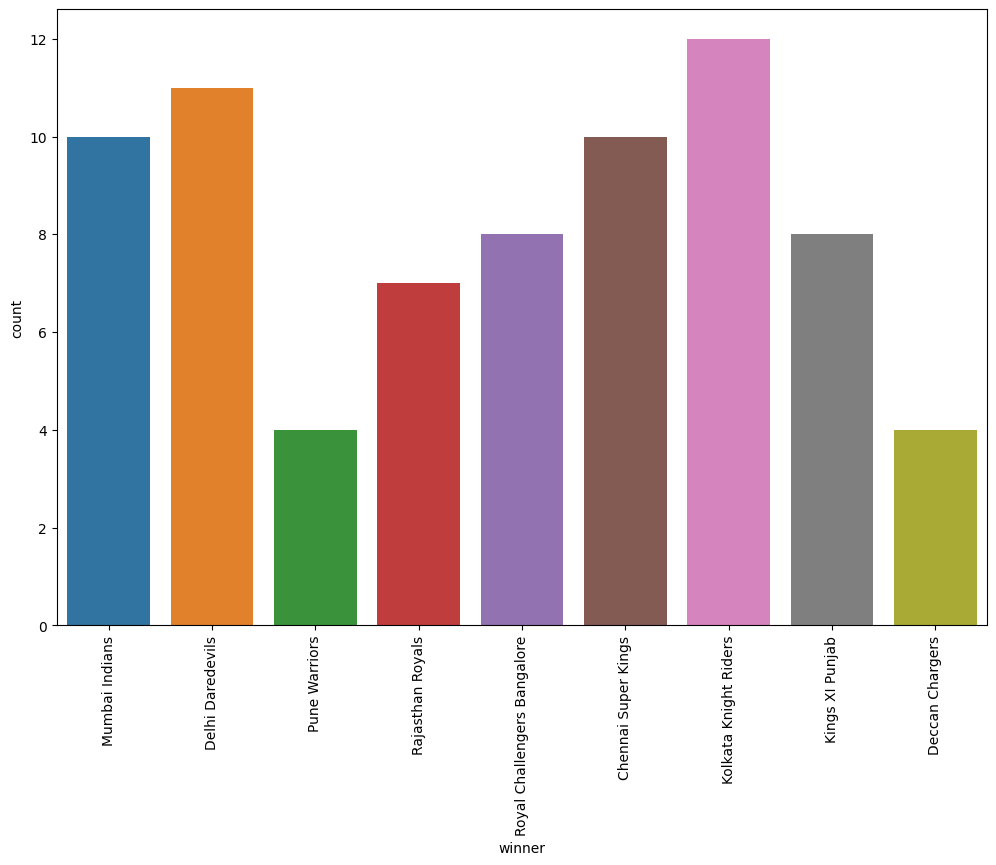

In [97]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_2012)
plt.xticks(rotation=90)
plt.show()

In [100]:
sgps = matches_df.groupby('venue')

In [101]:
sgps.groups

{'ACA-VDCA Stadium': [753, 754], 'Barabati Stadium': [185, 188, 336, 347, 485, 490, 496], 'Brabourne Stadium': [175, 187, 190, 193, 200, 206, 220, 514, 552, 557, 569], 'Buffalo Park': [137, 143, 149], 'De Beers Diamond Oval': [150, 151, 154], 'Dr DY Patil Sports Academy': [71, 81, 85, 116, 174, 198, 230, 231, 232, 233, 238, 243, 249, 263, 276, 294, 297], 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': [312, 315, 528, 530, 536, 612, 615, 618, 622, 624, 628], 'Dubai International Cricket Stadium': [461, 462, 466, 468, 469, 474, 476], 'Eden Gardens': [10, 13, 22, 26, 30, 39, 52, 63, 74, 87, 94, 102, 104, 111, 177, 181, 203, 207, 212, 226, 229, 239, 250, 254, 257, 269, 280, 302, 308, 321, 324, 343, 352, 362, 367, 381, 396, 405, 412, 414, 426, 455, 456, 503, 505, 510, 513, 517, 521, 526, 544, 554, 559, 575, 577, 580, 607, 613, 620, 623, 630, 638, 645, 648, 653, 668, 676, 684, 693, 694, 697, 701, 721, 724, 730, 738, 742], 'Feroz Shah Kotla': [14, 17, 38, 40, 43, 50, 54, 61, 75, 86, 97

In [102]:
df_venue_bng = sgps.get_group('M Chinnaswamy Stadium')
df_venue_bng  

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,IPL-2017,Bangalore,16-04-2017,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN
29,30,IPL-2017,Bangalore,27-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,IPL-2017,Bangalore,05-05-2017,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,7912,IPL-2018,Bengaluru,21-04-2018,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,AB de Villiers,M Chinnaswamy Stadium,Chris Gaffaney,O Nandan,A Nanda Kishore
659,7917,IPL-2018,Bengaluru,25-04-2018,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,MS Dhoni,M Chinnaswamy Stadium,Nigel Llong,Virender Kumar Sharma,Anil Chaudhary
664,7922,IPL-2018,Bengaluru,29-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
666,7924,IPL-2018,Bengaluru,01-05-2018,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,14,0,TG Southee,M Chinnaswamy Stadium,Marais Erasmus,Nitin Menon,Yeshwant Barde


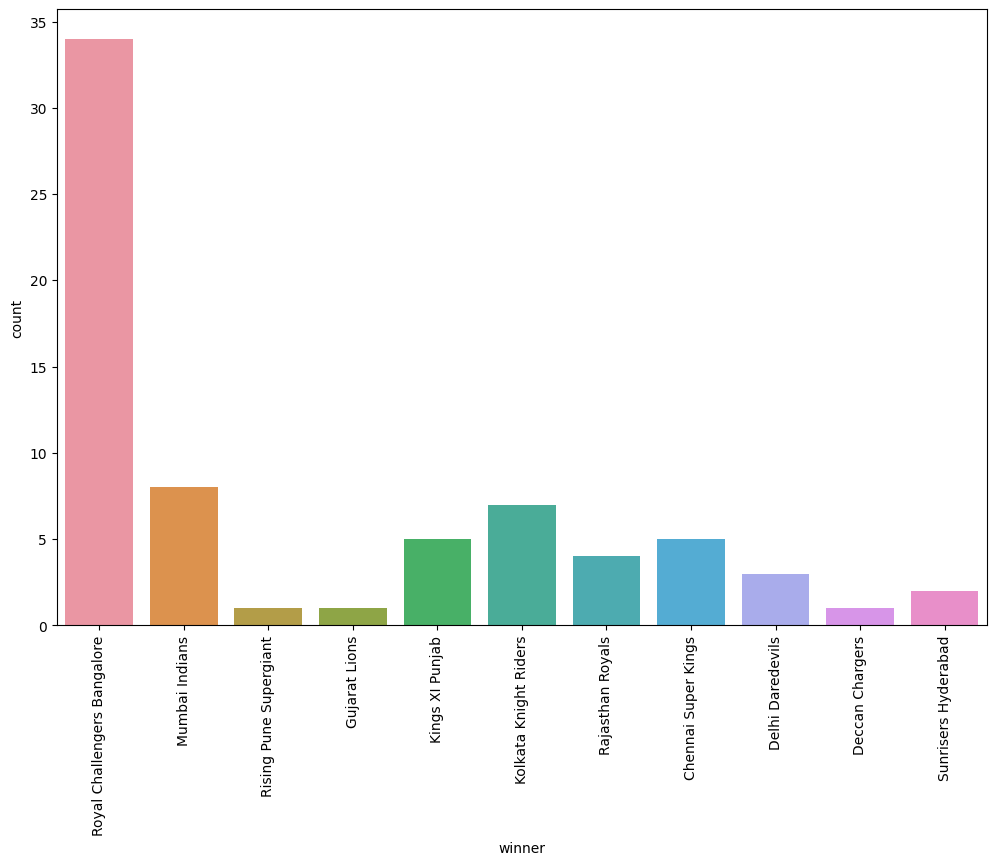

In [103]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_venue_bng)
plt.xticks(rotation=90)
plt.show()

In [104]:
df_venue_MI = sgps.get_group('Wankhede Stadium')
df_venue_MI  

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
15,16,IPL-2017,Mumbai,16-04-2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
23,24,IPL-2017,Mumbai,22-04-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,IPL-2017,Mumbai,24-04-2017,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,11315,IPL-2019,Mumbai,10-04-2019,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium,Yeshwant Barde,S Ravi,O Nandan
722,11318,IPL-2019,Mumbai,13-04-2019,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
726,11322,IPL-2019,Mumbai,15-04-2019,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Nanda Kishore
746,11342,IPL-2019,Mumbai,02-05-2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


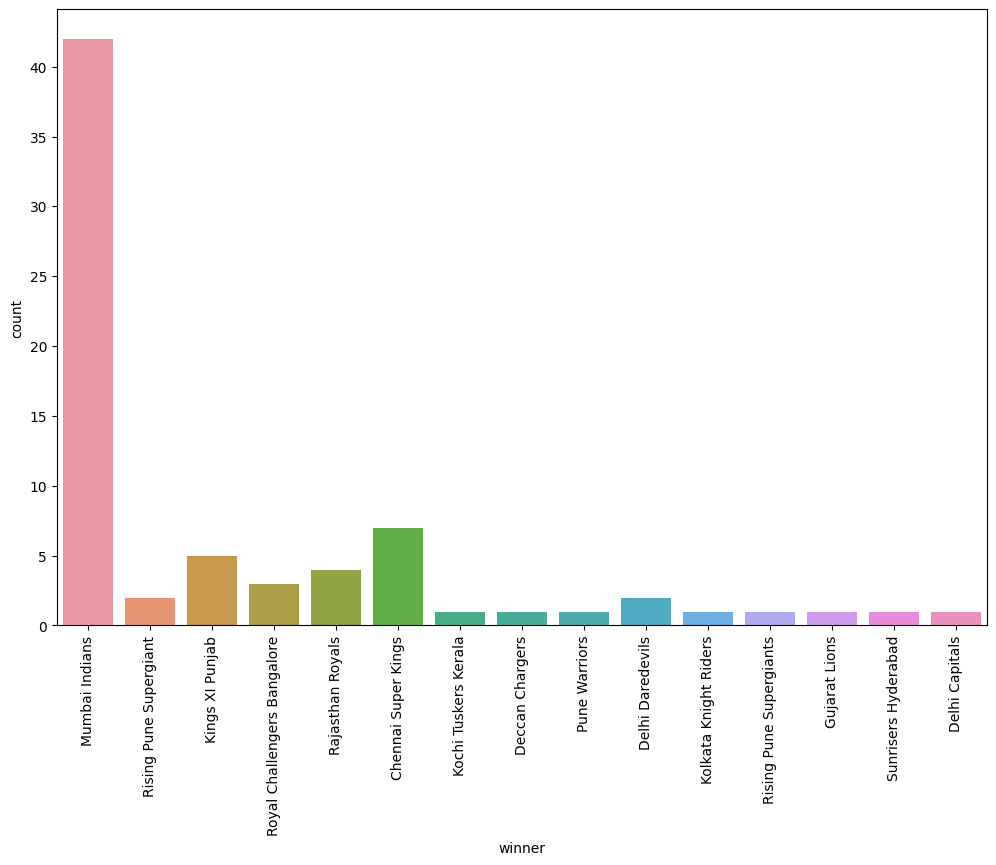

In [105]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_venue_MI)
plt.xticks(rotation=90)
plt.show()

In [107]:
temp_df = matches_df.drop_duplicates(subset=['Season'], keep='last')
temp_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [108]:
temp_df = matches_df.drop_duplicates(subset=['winner'], keep='last')
temp_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
55,56,IPL-2017,Mumbai,16-05-2017,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN
293,294,IPL-2011,Indore,15-05-2011,Rajasthan Royals,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,0,Kochi Tuskers Kerala,0,8,BJ Hodge,Holkar Cricket Stadium,PR Reiffel,RJ Tucker,NaN
375,376,IPL-2012,Hyderabad,20-05-2012,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,9,0,DW Steyn,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
450,451,IPL-2013,Pune,19-05-2013,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,normal,0,Pune Warriors,38,0,LJ Wright,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,NaN
628,629,IPL-2016,Visakhapatnam,21-05-2016,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
629,630,IPL-2016,Kanpur,21-05-2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
690,7948,IPL-2018,Delhi,20-05-2018,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Delhi Daredevils,11,0,A Mishra,Feroz Shah Kotla,Kumar Dharmasena,O Nandan,Vineet Kulkarni
740,11336,IPL-2019,Jaipur,27-04-2019,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi
743,11339,IPL-2019,Hyderabad,29-04-2019,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [109]:
temp_df = matches_df.drop_duplicates(subset=['id'], keep='last')
temp_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [111]:
temp_df = matches_df.drop_duplicates(subset=['Season','winner'], keep='last')
temp_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
45,46,IPL-2017,Chandigarh,07-05-2017,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,NaN
49,50,IPL-2017,Mumbai,11-05-2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
50,51,IPL-2017,Delhi,12-05-2017,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,normal,0,Delhi Daredevils,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
51,52,IPL-2017,Kanpur,13-05-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,Mohammed Siraj,Green Park,AK Chaudhary,Nitin Menon,NaN
54,55,IPL-2017,Delhi,14-05-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11345,IPL-2019,Bengaluru,04-05-2019,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Ulhas Gandhe
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [112]:
temp_df = matches_df.drop_duplicates(subset=['venue'], keep='last')
temp_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
129,130,IPL-2009,Cape Town,26-04-2009,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN
149,150,IPL-2009,East London,08-05-2009,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
154,155,IPL-2009,Kimberley,11-05-2009,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,normal,0,Deccan Chargers,53,0,DR Smith,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
161,162,IPL-2009,Port Elizabeth,16-05-2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
164,165,IPL-2009,Bloemfontein,17-05-2009,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
168,169,IPL-2009,Durban,20-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,M Muralitharan,Kingsmead,BG Jerling,SJA Taufel,NaN
171,172,IPL-2009,Centurion,22-05-2009,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
219,220,IPL-2010,Nagpur,12-04-2010,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,13,0,Harmeet Singh,"Vidarbha Cricket Association Stadium, Jamtha",RE Koertzen,RB Tiffin,NaN
277,278,IPL-2011,Kochi,05-05-2011,Kochi Tuskers Kerala,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kochi Tuskers Kerala,17,0,BJ Hodge,Nehru Stadium,S Ravi,RJ Tucker,NaN


In [114]:
temp_df = matches_df.drop_duplicates(subset=['Season'],keep='last')
temp_df.iloc[:,[1,10]]

,Season,winner
58,IPL-2017,Mumbai Indians
116,IPL-2008,Rajasthan Royals
173,IPL-2009,Deccan Chargers
233,IPL-2010,Chennai Super Kings
306,IPL-2011,Chennai Super Kings
380,IPL-2012,Kolkata Knight Riders
456,IPL-2013,Mumbai Indians
516,IPL-2014,Kolkata Knight Riders
575,IPL-2015,Mumbai Indians
635,IPL-2016,Sunrisers Hyderabad


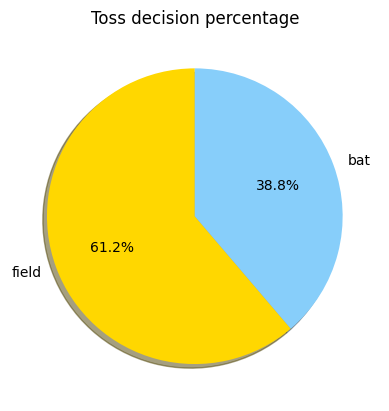

In [115]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [116]:
sgps = matches_df.groupby('team1')

In [117]:
sgps.groups

{'Chennai Super Kings': [60, 66, 73, 78, 82, 84, 90, 95, 116, 121, 130, 136, 140, 143, 148, 158, 165, 168, 172, 181, 193, 205, 210, 215, 223, 231, 233, 234, 242, 247, 251, 261, 271, 280, 284, 288, 296, 301, 306, 307, 312, 317, 323, 331, 346, 351, 354, 370, 378, 379, 380, 403, 417, 421, 424, 434, 441, 445, 453, 459, 464, 466, 477, 498, 503, 506, 518, 520, 526, 532, 537, 541, 546, 553, 558, 562, 564, 652, 655, 662, 665, 668, 678, 707, 713, 728, 745, 750, 752], 'Deccan Chargers': [63, 65, 67, 76, 79, 88, 107, 113, 123, 127, 135, 139, 146, 150, 154, 173, 178, 185, 188, 194, 219, 228, 232, 235, 244, 248, 252, 264, 278, 285, 291, 299, 315, 322, 327, 330, 336, 340, 345, 347, 355, 365, 375], 'Delhi Capitals': [698, 700, 711, 725, 741, 754], 'Delhi Daredevils': [8, 14, 17, 30, 34, 50, 72, 75, 86, 92, 97, 99, 124, 132, 157, 160, 164, 166, 171, 184, 196, 199, 202, 208, 217, 237, 240, 258, 262, 268, 273, 300, 341, 344, 356, 363, 381, 393, 400, 418, 427, 432, 442, 458, 479, 482, 484, 488, 501, 511,

In [118]:
df_team1_bng = sgps.get_group('Royal Challengers Bangalore')
df_team1_bng  

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
19,20,IPL-2017,Rajkot,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN
29,30,IPL-2017,Bangalore,27-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,11322,IPL-2019,Mumbai,15-04-2019,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Nanda Kishore
730,11326,IPL-2019,Kolkata,19-04-2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
734,11330,IPL-2019,Bengaluru,21-04-2019,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M. Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker,Anil Chaudhary
737,11333,IPL-2019,Bengaluru,24-04-2019,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker


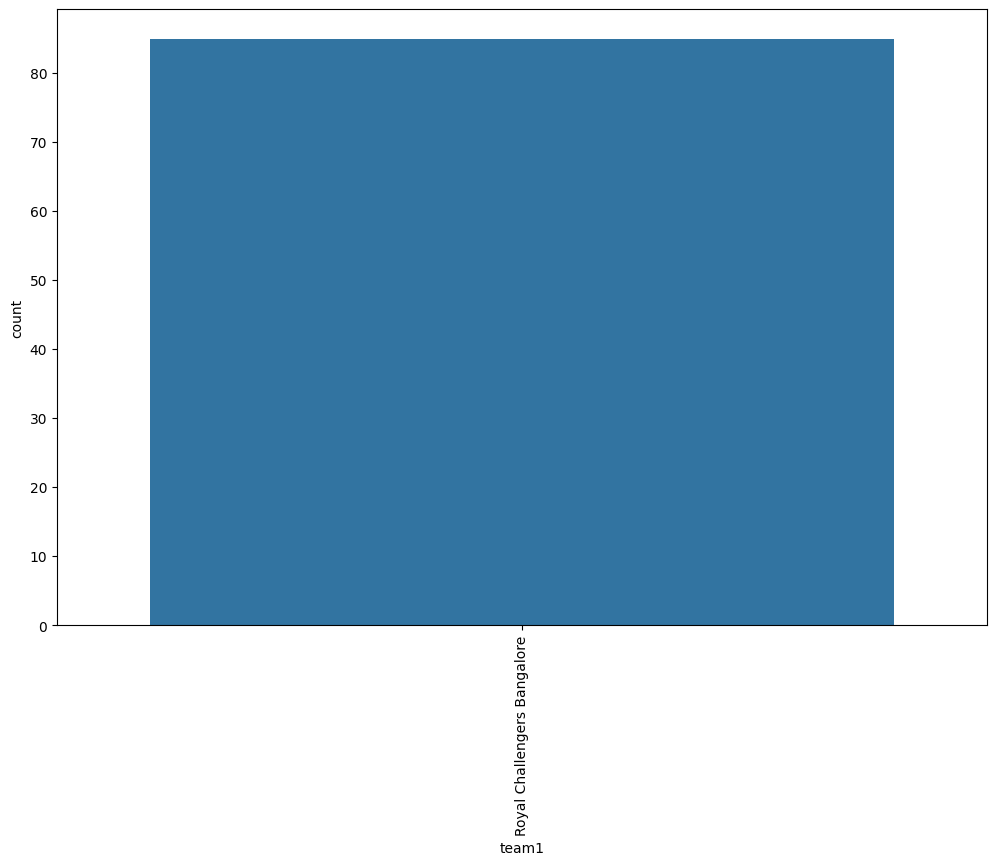

In [119]:
plt.figure(figsize=(12,8))
sns.countplot(x='team1',data=df_team1_bng)
plt.xticks(rotation=90)
plt.show()

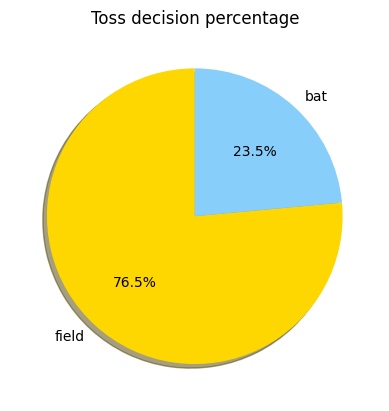

In [120]:
temp_series = df_team1_bng.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [121]:
df_team1_csk = sgps.get_group('Chennai Super Kings')
df_team1_csk 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,IPL-2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,IPL-2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
73,74,IPL-2008,Bangalore,28-04-2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,IPL-2008,Chennai,02-05-2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
82,83,IPL-2008,Jaipur,04-05-2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,IPL-2019,Chennai,06-04-2019,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin
728,11324,IPL-2019,Hyderabad,17-04-2019,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,Ian Gould,Ulhas Gandhe,C Shamshuddin
745,11341,IPL-2019,Chennai,01-05-2019,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford


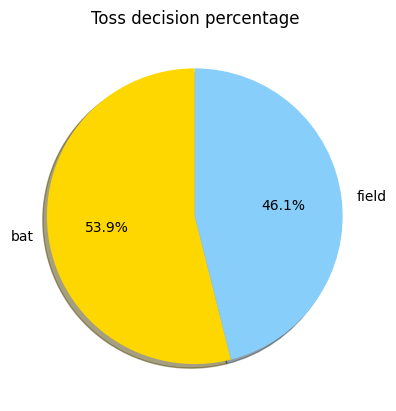

In [122]:
temp_series = df_team1_csk.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [123]:
df_team1_MI = sgps.get_group('Mumbai Indians')
df_team1_MI 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
23,24,IPL-2017,Mumbai,22-04-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
46,47,IPL-2017,Hyderabad,08-05-2017,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
52,53,IPL-2017,Kolkata,13-05-2017,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,11325,IPL-2019,Delhi,18-04-2019,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary
731,11327,IPL-2019,Jaipur,20-04-2019,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium,S Ravi,Yeshwant Barde,O Nandan
739,11335,IPL-2019,Chennai,26-04-2019,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
746,11342,IPL-2019,Mumbai,02-05-2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


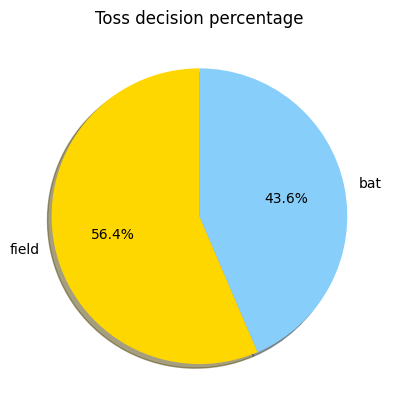

In [124]:
temp_series = df_team1_MI.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

# Score DataSet

In [127]:
score_df = pd.read_csv("/kaggle/input/ipl-data-set/deliveries.csv")
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# BATSMAN ANALYSIS:

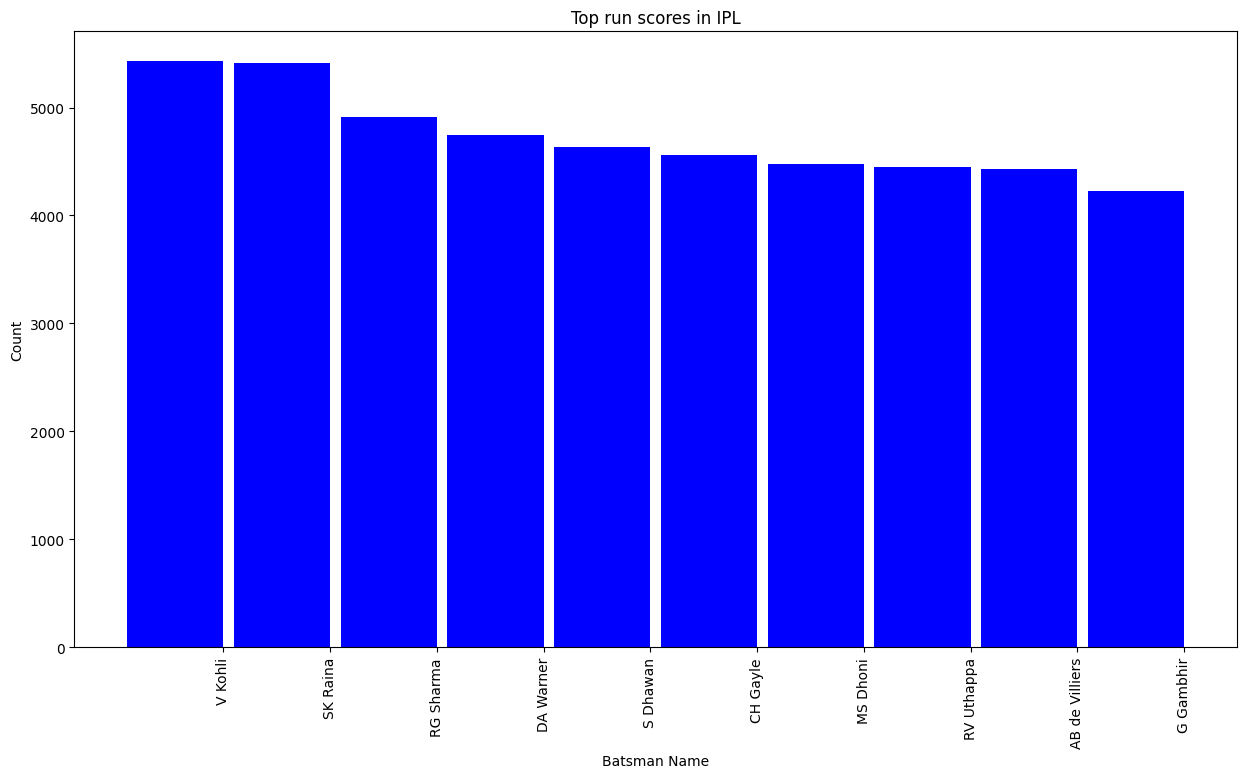

In [128]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']),width=width,
              color = 'blue')
ax.set_xticks(ind+(width)/2.)
ax.set_xticklabels(labels, rotation ='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scores in IPL")
ax.set_xlabel('Batsman Name')
#autolabel(rects)
plt.show()